# DRUG ABUSE DATA

In [1]:
import numpy as np                   # 2D arrays
import matplotlib.pyplot as plt       # for data visualisation
import pandas as pd                   # reading csv file and turning to dataframe
import seaborn as sns                 # for Data visualisation
import glob
import folium
import re
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import datetime
from shapely.geometry import Point
import geopandas as gpd
from google.cloud import bigquery
import contextily as ctx

In [2]:
data = pd.read_csv(r"C:\Users\micha\Downloads\archive (15)\drugs.csv")
Drugs = data
Drugs.head()

,State,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,Rates.Alcohol.Use Disorder Past Year.12-17,Rates.Alcohol.Use Disorder Past Year.18-25,...,Totals.Marijuana.Used Past Year.26+,Rates.Marijuana.Used Past Year.12-17,Rates.Marijuana.Used Past Year.18-25,Rates.Marijuana.Used Past Year.26+,Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,Rates.Tobacco.Use Past Month.12-17,Rates.Tobacco.Use Past Month.18-25,Rates.Tobacco.Use Past Month.26+
0,Alabama,2002,380805,499453,2812905,18,68,138,0.048336,0.136490,...,141,0.127535,0.237880,0.050275,63,226,930,0.166578,0.451976,0.330659
1,Alaska,2002,69400,62791,368460,4,12,27,0.061479,0.187891,...,46,0.188730,0.389026,0.124566,11,30,112,0.163918,0.484270,0.304220
2,Arizona,2002,485521,602265,3329482,36,117,258,0.073819,0.193626,...,215,0.169646,0.275435,0.064640,73,240,1032,0.151071,0.397968,0.309969
3,Arkansas,2002,232986,302029,1687337,14,53,101,0.061457,0.175913,...,104,0.157567,0.288856,0.061510,46,169,660,0.195714,0.558846,0.391210
4,California,2002,3140739,3919577,21392421,173,581,1298,0.055109,0.148312,...,1670,0.141067,0.282887,0.078068,290,1377,4721,0.092235,0.351353,0.220699


In [3]:
Drugs.tail()

,State,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,Rates.Alcohol.Use Disorder Past Year.12-17,Rates.Alcohol.Use Disorder Past Year.18-25,...,Totals.Marijuana.Used Past Year.26+,Rates.Marijuana.Used Past Year.12-17,Rates.Marijuana.Used Past Year.18-25,Rates.Marijuana.Used Past Year.26+,Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,Rates.Tobacco.Use Past Month.12-17,Rates.Tobacco.Use Past Month.18-25,Rates.Tobacco.Use Past Month.26+
862,Virginia,2018,629725,869285,5581639,10,82,267,0.015199,0.094035,...,518,0.096489,0.329603,0.092889,28,266,1234,0.045116,0.305545,0.221150
863,Washington,2018,545968,738052,5065742,11,75,282,0.020069,0.101770,...,1199,0.163818,0.454971,0.236665,20,163,1150,0.037481,0.220519,0.227040
864,West Virginia,2018,124659,174236,1235448,2,15,46,0.017428,0.087561,...,144,0.121996,0.330921,0.116328,10,70,438,0.081434,0.400053,0.354690
865,Wisconsin,2018,442510,615930,3861670,8,74,217,0.018720,0.120776,...,466,0.120078,0.326326,0.120566,17,157,917,0.038051,0.254571,0.237359
866,Wyoming,2018,44908,57395,377084,1,7,22,0.023695,0.124825,...,38,0.124362,0.308483,0.100652,3,22,107,0.071889,0.381427,0.282912


In [4]:
Drugs.isna().sum().head()

State               0
Year                0
Population.12-17    0
Population.18-25    0
Population.26+      0
dtype: int64

In [5]:
Drugs.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
862    False
863    False
864    False
865    False
866    False
Length: 867, dtype: bool

In [6]:
Drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   State                                              867 non-null    object 
 1   Year                                               867 non-null    int64  
 2   Population.12-17                                   867 non-null    int64  
 3   Population.18-25                                   867 non-null    int64  
 4   Population.26+                                     867 non-null    int64  
 5   Totals.Alcohol.Use Disorder Past Year.12-17        867 non-null    int64  
 6   Totals.Alcohol.Use Disorder Past Year.18-25        867 non-null    int64  
 7   Totals.Alcohol.Use Disorder Past Year.26+          867 non-null    int64  
 8   Rates.Alcohol.Use Disorder Past Year.12-17         867 non-null    float64
 9   Rates.Alco

In [7]:
Drugs.columns

Index(['State', 'Year', 'Population.12-17', 'Population.18-25',
       'Population.26+', 'Totals.Alcohol.Use Disorder Past Year.12-17',
       'Totals.Alcohol.Use Disorder Past Year.18-25',
       'Totals.Alcohol.Use Disorder Past Year.26+',
       'Rates.Alcohol.Use Disorder Past Year.12-17',
       'Rates.Alcohol.Use Disorder Past Year.18-25',
       'Rates.Alcohol.Use Disorder Past Year.26+',
       'Totals.Alcohol.Use Past Month.12-17',
       'Totals.Alcohol.Use Past Month.18-25',
       'Totals.Alcohol.Use Past Month.26+',
       'Rates.Alcohol.Use Past Month.12-17',
       'Rates.Alcohol.Use Past Month.18-25',
       'Rates.Alcohol.Use Past Month.26+',
       'Totals.Tobacco.Cigarette Past Month.12-17',
       'Totals.Tobacco.Cigarette Past Month.18-25',
       'Totals.Tobacco.Cigarette Past Month.26+',
       'Rates.Tobacco.Cigarette Past Month.12-17',
       'Rates.Tobacco.Cigarette Past Month.18-25',
       'Rates.Tobacco.Cigarette Past Month.26+',
       'Totals.Illicit Drug

# Trends of Alcohol Abuse Over the Years

In [8]:
# converting the 'Year' column to datetime object
Drugs['Year'] = pd.to_datetime(Drugs['Year'], format='%Y')

In [9]:
# grouping by Type, will use for many different categories
grouped = Drugs.groupby('Year')['Totals.Alcohol.Use Disorder Past Year.12-17'].sum()

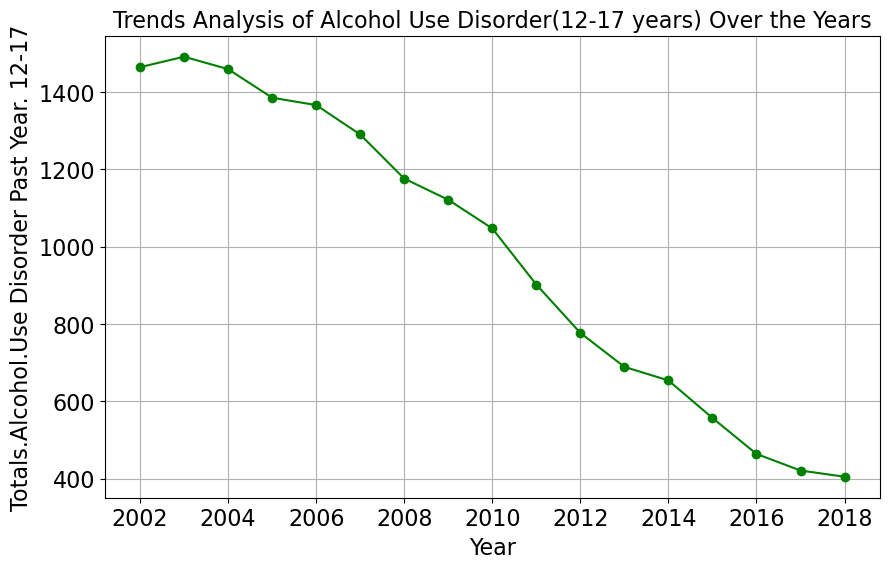

In [10]:
# Using a line plot of visualise
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped.values, marker='o', color='g')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Totals.Alcohol.Use Disorder Past Year. 12-17', fontsize=16)
plt.title('Trends Analysis of Alcohol Use Disorder(12-17 years) Over the Years', fontsize=16)
plt.grid()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

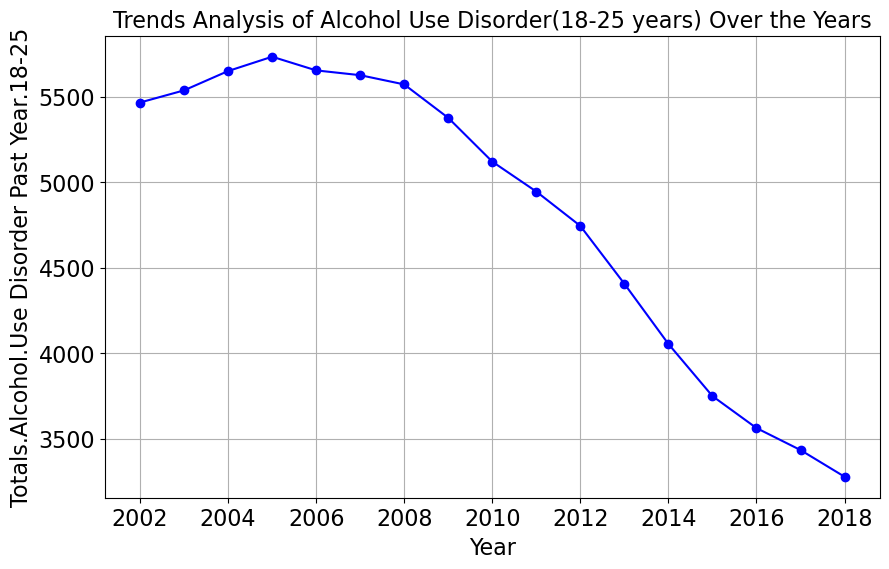

In [11]:
# grouping by Type, will use for many different categories
grouped = Drugs.groupby('Year')['Totals.Alcohol.Use Disorder Past Year.18-25'].sum()

# Using a line plot of visualise
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped.values, marker='o', color='b')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Totals.Alcohol.Use Disorder Past Year.18-25', fontsize=16)
plt.title('Trends Analysis of Alcohol Use Disorder(18-25 years) Over the Years', fontsize=16)
plt.grid()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

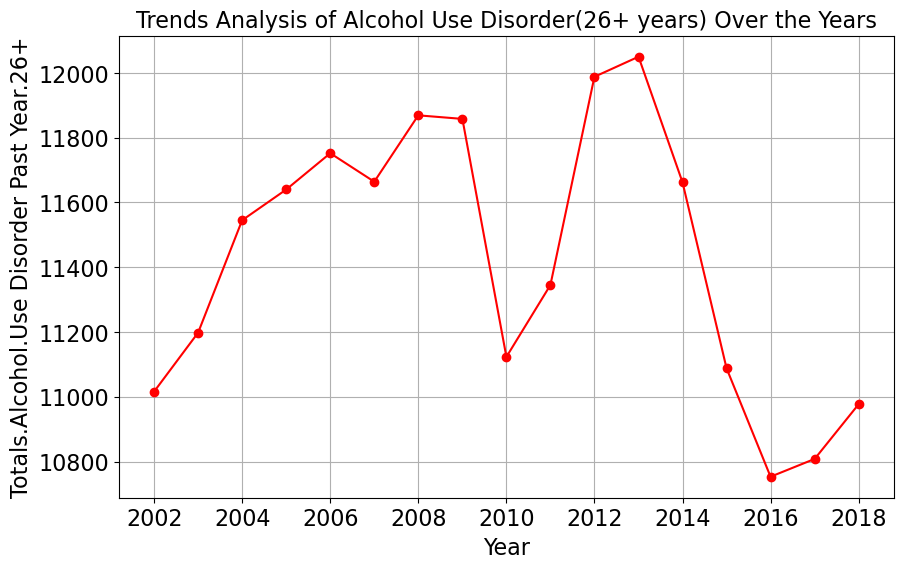

In [12]:
# grouping by Type, will use for many different categories
grouped = Drugs.groupby('Year')['Totals.Alcohol.Use Disorder Past Year.26+'].sum()

# Using a line plot of visualise
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped.values, marker='o', color='r')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Totals.Alcohol.Use Disorder Past Year.26+', fontsize=16)
plt.title('Trends Analysis of Alcohol Use Disorder(26+ years) Over the Years', fontsize=16)
plt.grid()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

# Trends of Tabacoo Abuse Over the Years

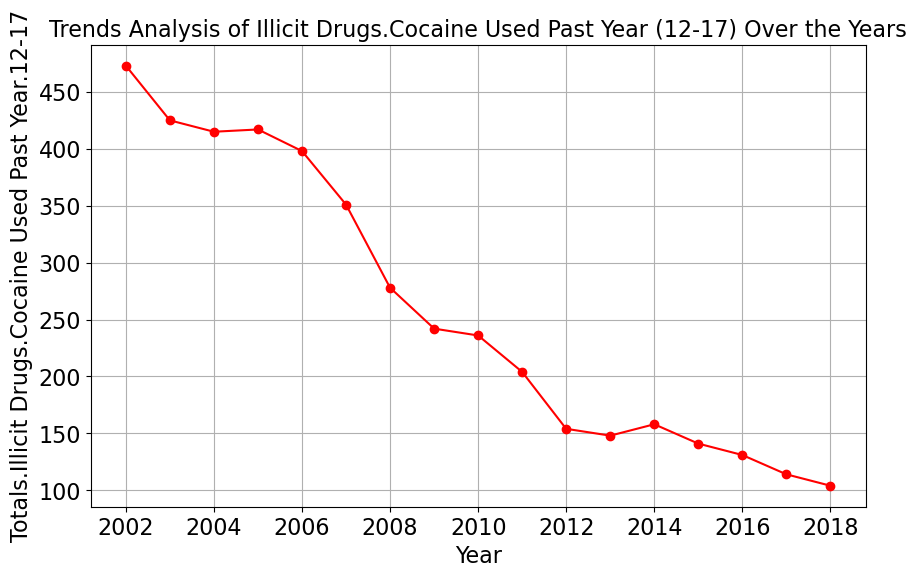

In [13]:
# grouping by Type, will use for many different categories
grouped = Drugs.groupby('Year')['Totals.Illicit Drugs.Cocaine Used Past Year.12-17'].sum()

# Using a line plot of visualise
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped.values, marker='o', color='r')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Totals.Illicit Drugs.Cocaine Used Past Year.12-17', fontsize=16)
plt.title('Trends Analysis of Illicit Drugs.Cocaine Used Past Year (12-17) Over the Years', fontsize=16)
plt.grid()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

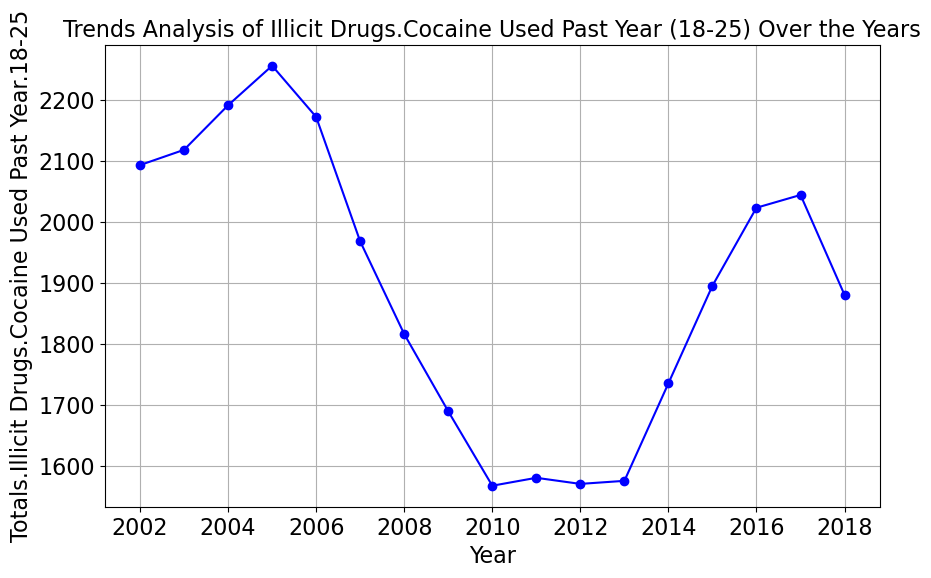

In [14]:
# grouping by Type, will use for many different categories
grouped = Drugs.groupby('Year')['Totals.Illicit Drugs.Cocaine Used Past Year.18-25'].sum()

# Using a line plot of visualise
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped.values, marker='o', color='b')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Totals.Illicit Drugs.Cocaine Used Past Year.18-25', fontsize=16)
plt.title('Trends Analysis of Illicit Drugs.Cocaine Used Past Year (18-25) Over the Years', fontsize=16)
plt.grid()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

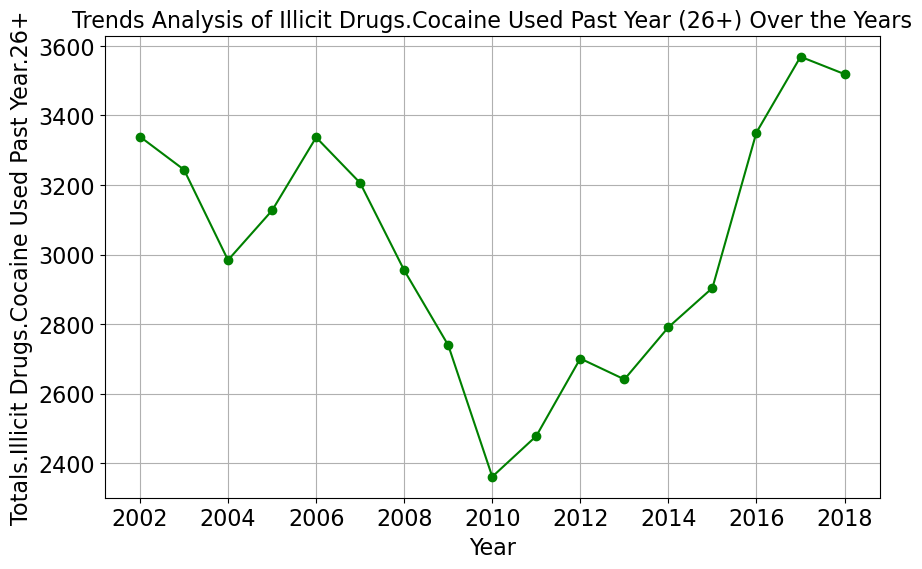

In [15]:
# grouping by Type, will use for many different categories
grouped = Drugs.groupby('Year')['Totals.Illicit Drugs.Cocaine Used Past Year.26+'].sum()

# Using a line plot of visualise
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped.values, marker='o', color='g')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Totals.Illicit Drugs.Cocaine Used Past Year.26+', fontsize=16)
plt.title('Trends Analysis of Illicit Drugs.Cocaine Used Past Year (26+) Over the Years', fontsize=16)
plt.grid()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

# Trend in Use or Marijuana over the years

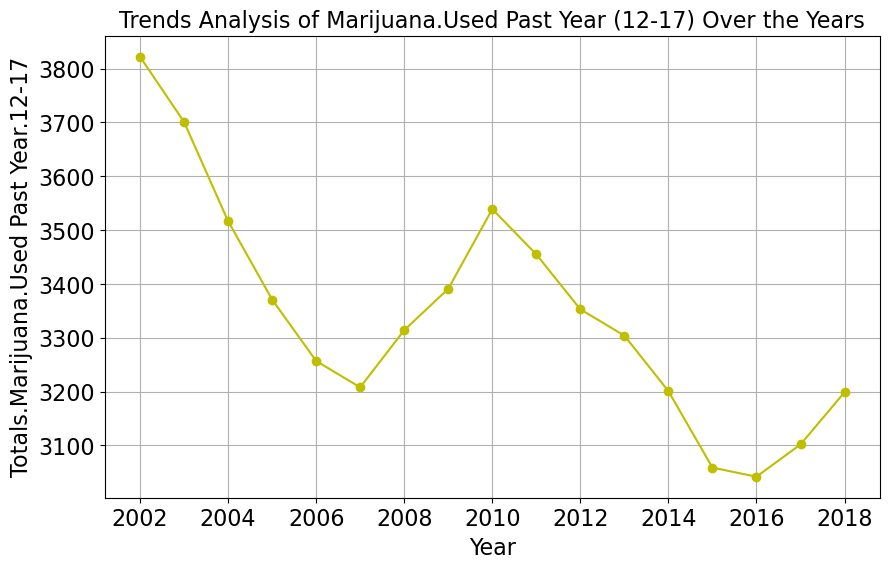

In [16]:
# grouping by Type, will use for many different categories
grouped = Drugs.groupby('Year')['Totals.Marijuana.Used Past Year.12-17'].sum()

# Using a line plot of visualise
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped.values, marker='o', color='y')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Totals.Marijuana.Used Past Year.12-17', fontsize=16)
plt.title('Trends Analysis of Marijuana.Used Past Year (12-17) Over the Years', fontsize=16)
plt.grid()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

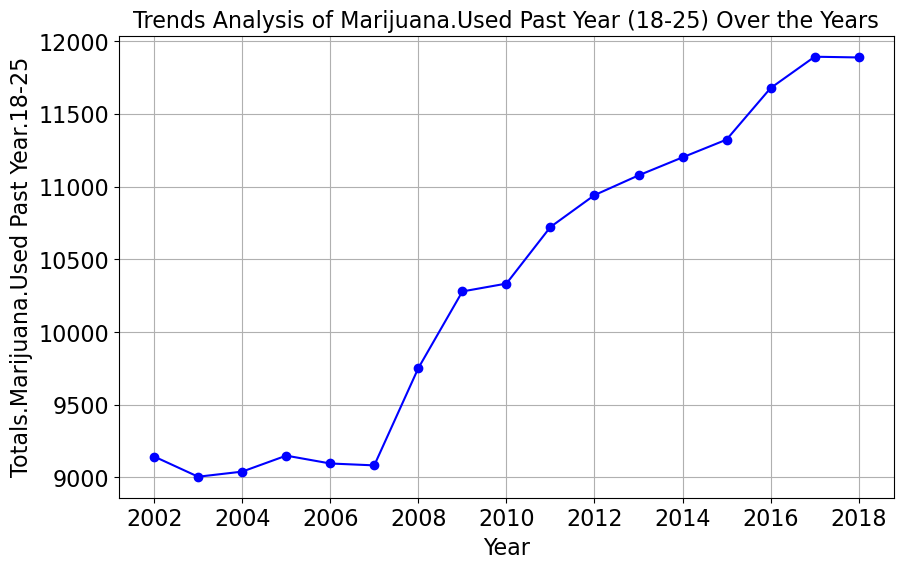

In [17]:
# grouping by Type, will use for many different categories
grouped = Drugs.groupby('Year')['Totals.Marijuana.Used Past Year.18-25'].sum()

# Using a line plot of visualise
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped.values, marker='o', color='b')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Totals.Marijuana.Used Past Year.18-25', fontsize=16)
plt.title('Trends Analysis of Marijuana.Used Past Year (18-25) Over the Years', fontsize=16)
plt.grid()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

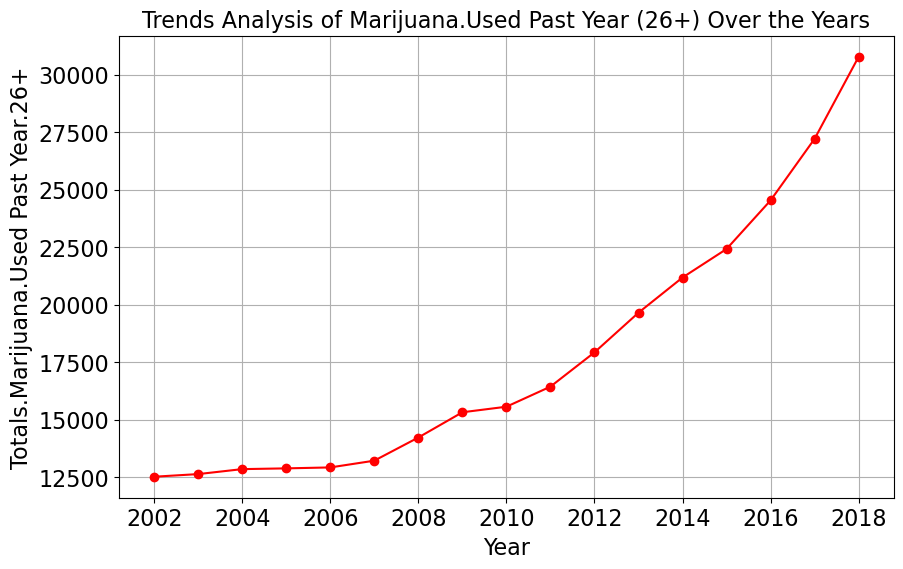

In [18]:
# grouping by Type, will use for many different categories
grouped = Drugs.groupby('Year')['Totals.Marijuana.Used Past Year.26+'].sum()

# Using a line plot of visualise
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped.values, marker='o', color='r')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Totals.Marijuana.Used Past Year.26+', fontsize=16)
plt.title('Trends Analysis of Marijuana.Used Past Year (26+) Over the Years', fontsize=16)
plt.grid()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

# Age Group Analysis

In [19]:
data_latest_year = Drugs[Drugs['Year'] == Drugs['Year'].max()]

In [20]:
age_12_17 = data_latest_year.filter(like='12-17').sum()
age_18_25 = data_latest_year.filter(like='18-25').sum()
age_26_plus = data_latest_year.filter(like='26+').sum()

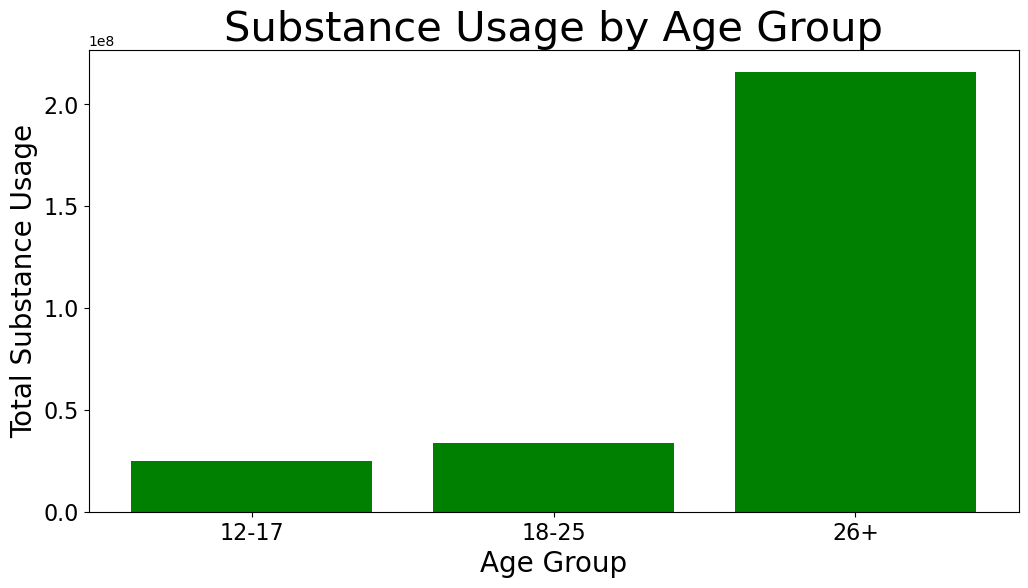

In [21]:
labels = ['12-17', '18-25', '26+']
totals = [age_12_17.sum(), age_18_25.sum(), age_26_plus.sum()]

# Histogram to see distribution across age groups
plt.figure(figsize=(12,6))
plt.bar(labels, totals, color='green')
plt.xlabel('Age Group', fontsize=20)
plt.ylabel('Total Substance Usage', fontsize=20)
plt.title('Substance Usage by Age Group', fontsize=30)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

# State-Wide Analysis

In [22]:
# grouping by State and get the sum
state_wise_data = data_latest_year.groupby('State').sum()

# finding the state with highest total substance usage
state_wise_data['Total'] = state_wise_data.sum(axis=1)

# Getting the state with the highest total value
highest_state = state_wise_data['Total'].idxmax()
print(f"{highest_state} has the Highest amount of Substance from the Data")

California has the Highest amount of Substance from the Data


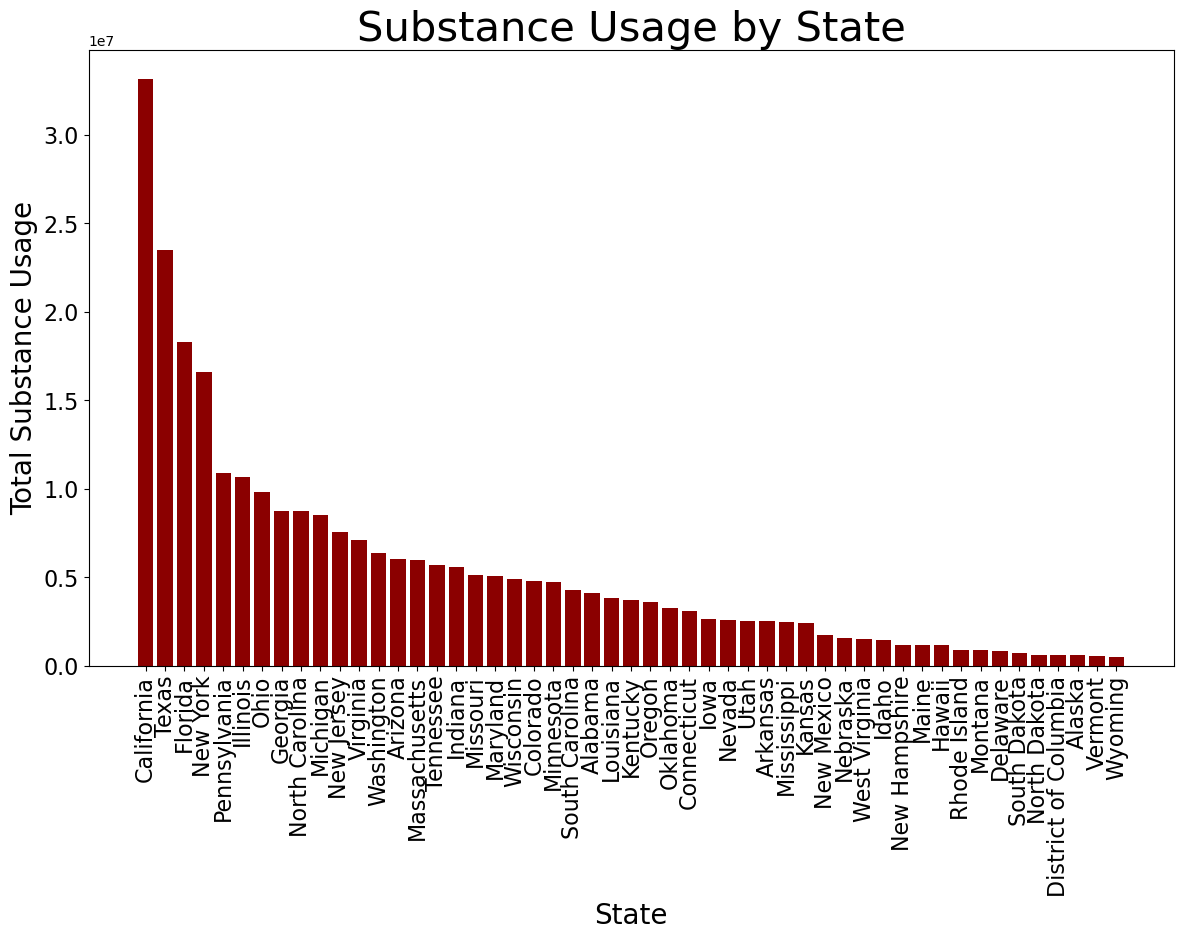

In [23]:
# Plotting State vs Total Substance Usage
state_wise_data = state_wise_data.sort_values(by='Total', ascending=False) # sorted for better visualization
plt.figure(figsize=(14,8))
plt.bar(state_wise_data.index, state_wise_data['Total'], color='darkred')
plt.xlabel('State', fontsize=20)
plt.ylabel('Total Substance Usage', fontsize=20)
plt.title('Substance Usage by State', fontsize=30)
plt.xticks(rotation=90) # rotate the x labels for better visibility
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

# Comparison of Substance Abuse 

In [24]:
alcohol_use = data_latest_year[['Totals.Alcohol.Use Disorder Past Year.12-17', 'Totals.Alcohol.Use Disorder Past Year.18-25', 'Totals.Alcohol.Use Disorder Past Year.26+']].sum().sum()
marijuana_use = data_latest_year[['Totals.Marijuana.Used Past Year.12-17', 'Totals.Marijuana.Used Past Year.18-25', 'Totals.Marijuana.Used Past Year.26+']].sum().sum()
cocaine_use = data_latest_year[['Totals.Illicit Drugs.Cocaine Used Past Year.12-17', 'Totals.Illicit Drugs.Cocaine Used Past Year.18-25', 'Totals.Illicit Drugs.Cocaine Used Past Year.26+']].sum().sum()


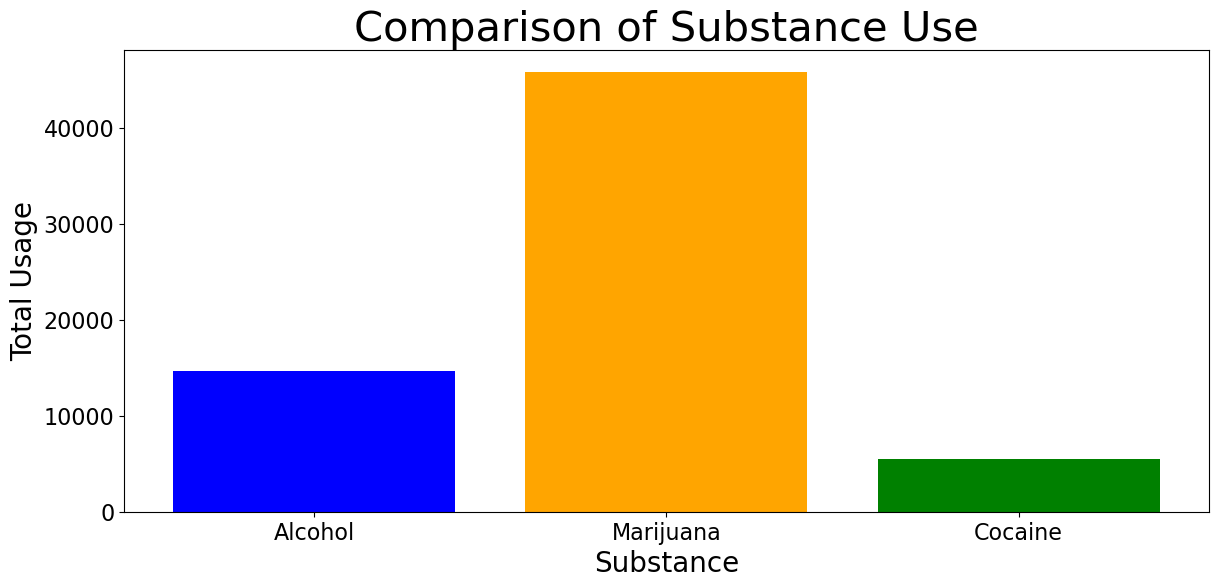

In [25]:
labels = ['Alcohol',  'Marijuana', 'Cocaine']
totals = [alcohol_use,  marijuana_use, cocaine_use]

# Bar chart to compare substance uses
plt.figure(figsize=(14,6))
plt.bar(labels, totals, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Substance',fontsize=20)
plt.ylabel('Total Usage',fontsize=20)
plt.title('Comparison of Substance Use',fontsize=30)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

# Rates of New Marijuana Users

In [26]:
Drugs['Total_Marijuana_New_Users'] = Drugs[['Totals.Marijuana.New Users.12-17', 'Totals.Marijuana.New Users.18-25', 'Totals.Marijuana.New Users.26+']].sum(axis=1)

# grouping the result by year and see the trend.
result = Drugs.groupby('Year')['Total_Marijuana_New_Users'].sum()

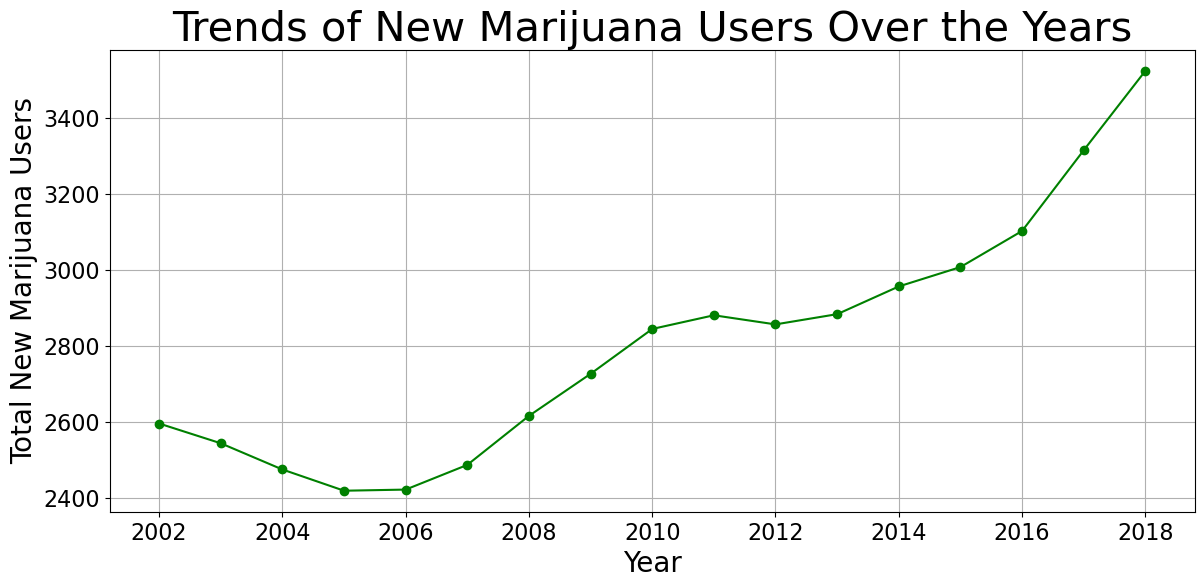

In [27]:
# Plotting Year vs Total New Marijuana Users
plt.figure(figsize=(14,6))
plt.plot(result.index, result.values, marker='o', linestyle='-', color='green')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Total New Marijuana Users',fontsize=20)
plt.title('Trends of New Marijuana Users Over the Years',fontsize=30)
plt.grid()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

# Correlation between the use of different substances

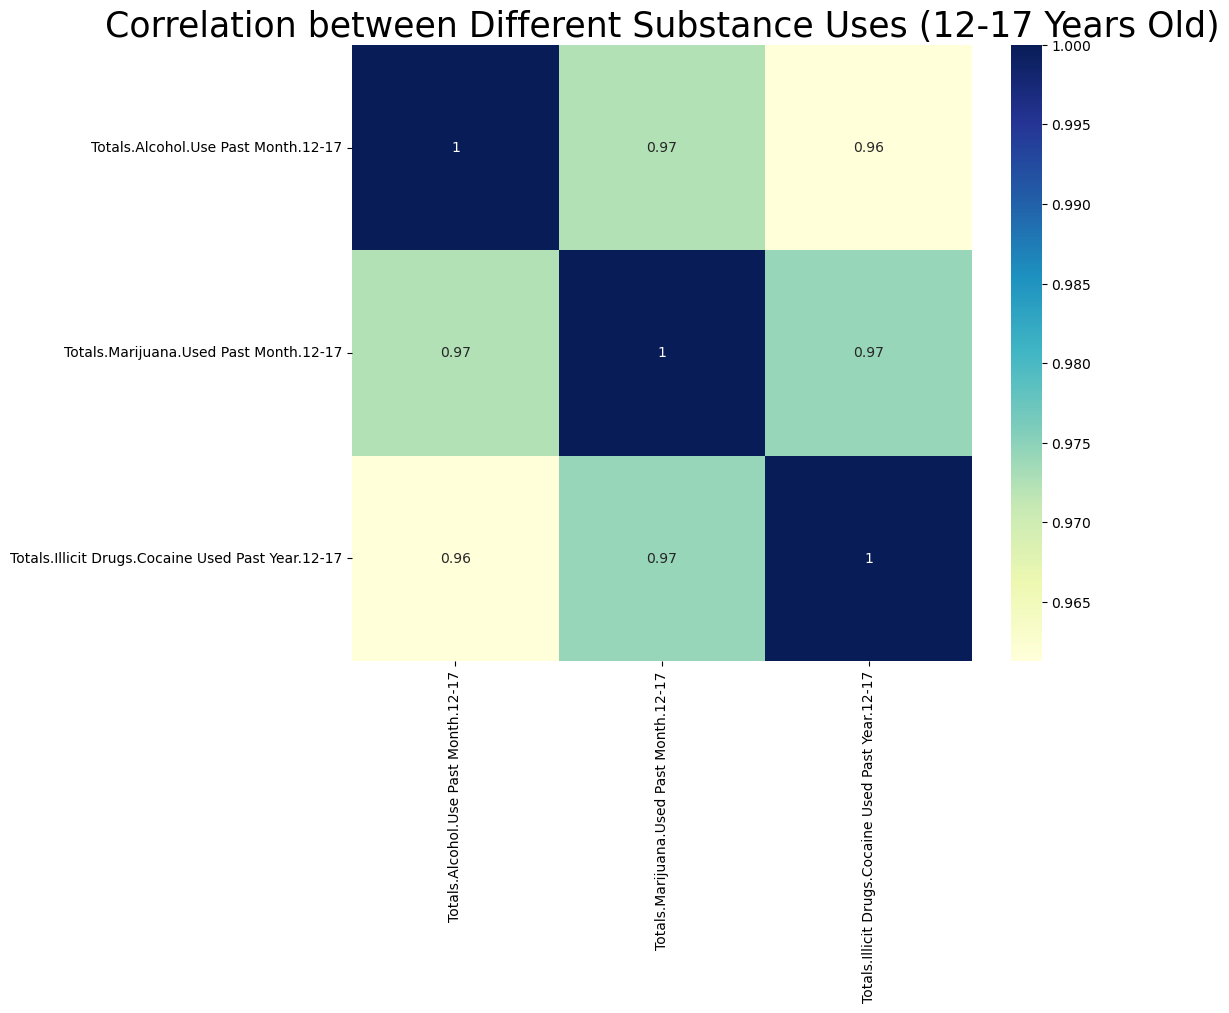

In [28]:
selected_columns = ['Totals.Alcohol.Use Past Month.12-17',  
        'Totals.Marijuana.Used Past Month.12-17',
        'Totals.Illicit Drugs.Cocaine Used Past Year.12-17']

# Subsetting the dataframe with selected columns
selected_data = data_latest_year[selected_columns]

# Compute correlations
correlation_matrix = selected_data.corr()

# Using seaborn to generate a heatmap of the correlations
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation between Different Substance Uses (12-17 Years Old)",fontsize=25)
plt.show()

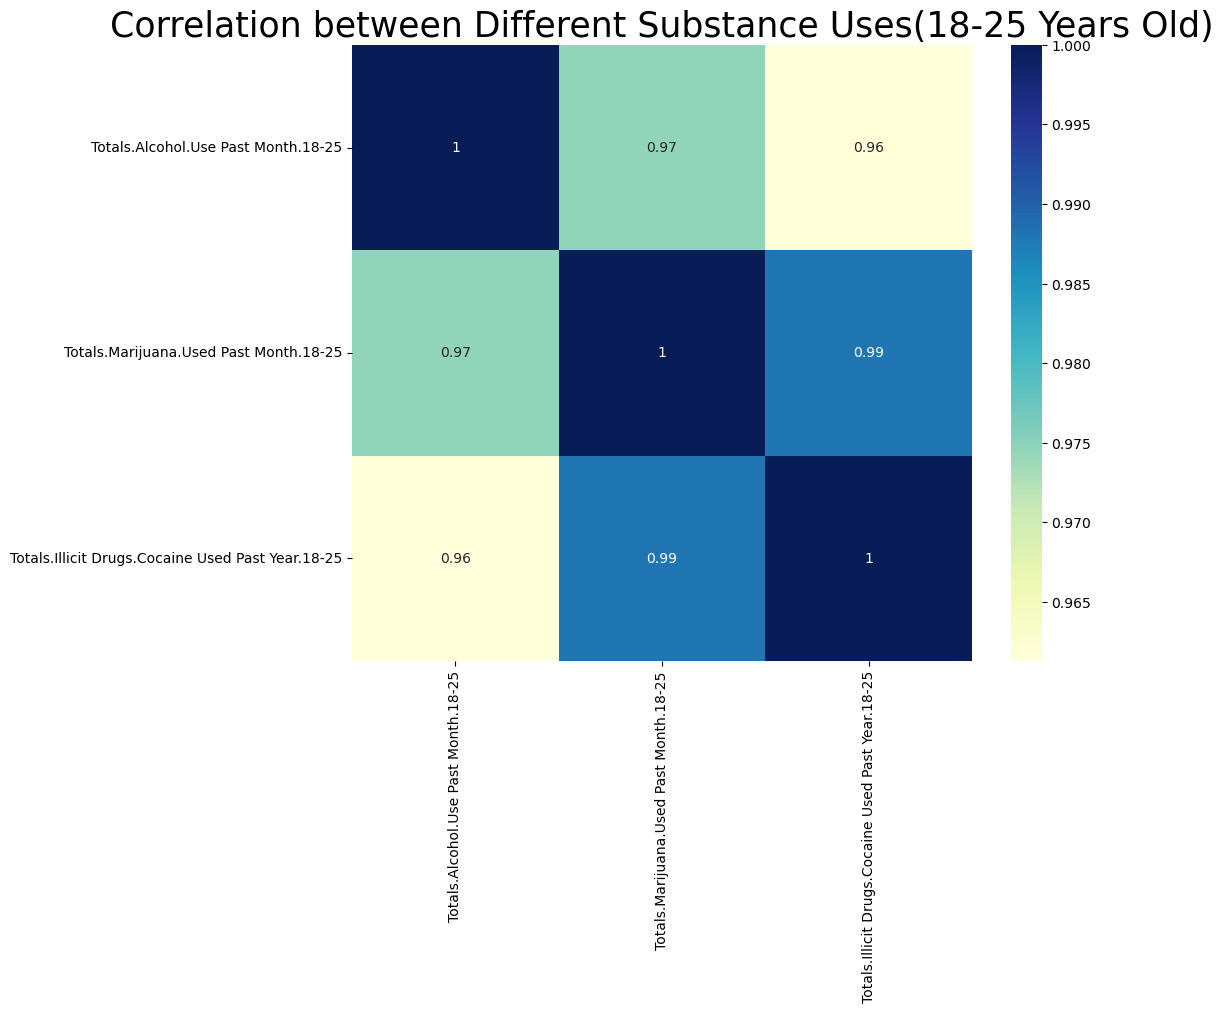

In [29]:
selected_columns = ['Totals.Alcohol.Use Past Month.18-25',  
        'Totals.Marijuana.Used Past Month.18-25',
        'Totals.Illicit Drugs.Cocaine Used Past Year.18-25']

# Subsetting the dataframe with selected columns
selected_data = data_latest_year[selected_columns]

# Compute correlations
correlation_matrix = selected_data.corr()

# Using seaborn to generate a heatmap of the correlations
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation between Different Substance Uses(18-25 Years Old)",fontsize=25)
plt.show()

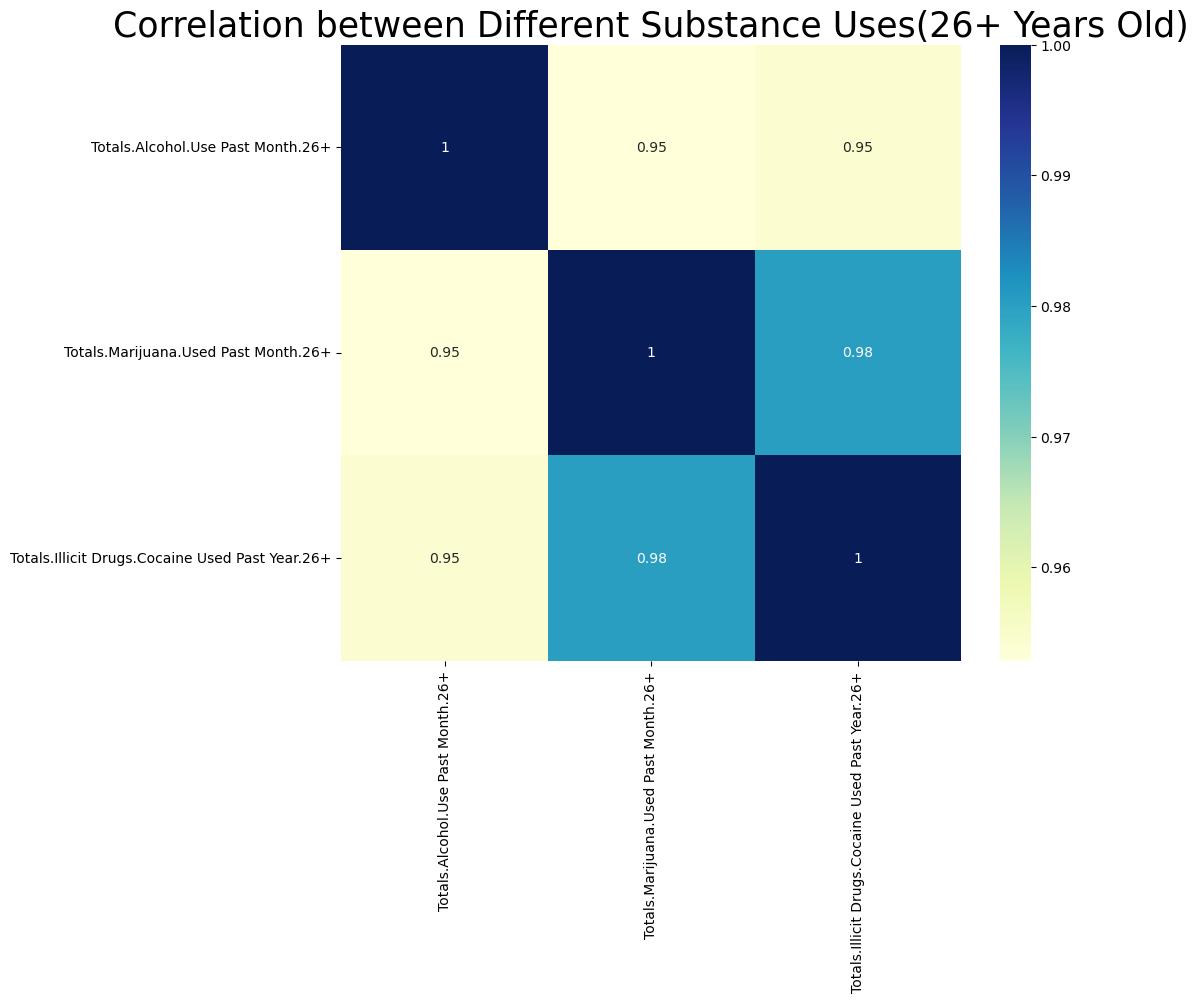

In [30]:
selected_columns = ['Totals.Alcohol.Use Past Month.26+',  
        'Totals.Marijuana.Used Past Month.26+',
        'Totals.Illicit Drugs.Cocaine Used Past Year.26+']

# Subsetting the dataframe with selected columns
selected_data = data_latest_year[selected_columns]

# Compute correlations
correlation_matrix = selected_data.corr()

# Using seaborn to generate a heatmap of the correlations
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation between Different Substance Uses(26+ Years Old)",fontsize=25)
plt.show()